# Ejercicio Regresion Lineal

## Alumno: Armando Misael Miranda Hernandez

En este notebook vamos a describir paso a paso un ejecicio de prediccion, a traves de la regresion lineal, de la cantidad de ocasiones en que sera compartido un articulo de area de Machine Learning presentado en un Blog.

### Prediccion: Cantidad de ocasiones en que se compartira el articulo del Blog

Iniciamos importardo librerias, ajustando y visualizando datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Se carga el archivo de datos de entrada csv como dataset de Pandas. Los datos provienen de https://www.kdnuggets.com/
#Revisar cuál es el directorio de trabajo del Jupiter---usar os.getcwd()---y poner al archivo ahí.
data = pd.read_csv("./articulos de blog ml.csv")

Pandas es una librería python destinada al análisis de datos que proporciona estructuras de datos flexibles que permiten trabajar con ellos de forma eficiente. Pandas ofrece las siguientes estructuras de datos: series: Son arrays con idexacion (arrays con indice o etiquetados), similar a los diccionarios. Puede generarse a partir de diccionarios de las listas. Dataframe: Son estructuras de datos similares a las tablas de base de datos relaciones con SQL. Panel, Panel4D y PanelND. Son estructuras de datos que permite trabajar con mas de dos dimensiones.

In [3]:
#Revisamos la dimension (Registros x Columnas) que contiene
data.shape

(161, 8)

In [4]:
#se puede revisar los primeros registros para darnos una idea de los datos
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Vemos que algunos atributos (columnas) tienes valores nulos (NaN); po ejemplo el atributo url

En este caso el atributo Shares sera la salida: es decir, el valor Y del modelo de regresion lineal. Por lo cual sera el valor que deseamos predecir

In [5]:
# Se realiza una estadistica descriptiva para tener conocimiento inicial de los datos mediante:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa que, por ejemplo la media del atributo word count (cantidad de palabras) es 1808.26
Que el articulo mas pequeno contiene 250 palabras y el mas grande tiene 8401 palabras.
Y respecto a cuanto se ha compartido un articulo (#Shares), existe los que nunca se han compartido (0 veces) y el o los recurrentes con 350000 ocasiones (muy popular).

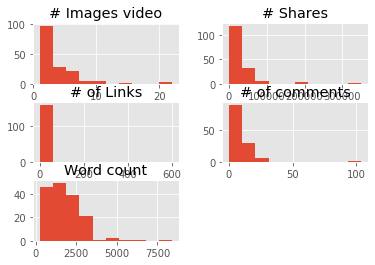

In [6]:
# Se visualizan los atributos de entrada mediante histogramas y barras (cuantitativas y cualitativas)
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

Las graficas anteriores comunican entre que valores se concentran la mayoria de los registros.
Seguidamente se filtran los datos por cantidad de palabras dejando los registros con menos de 3500 palabras y tambien por cantidad de compartidos con menos de 80.

### Se puede visualizar por ejemplo cantidad de palabras vs compartidos 

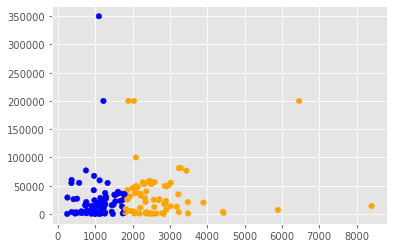

In [7]:
# visualizar datos de entrada
colores = ['orange','blue']
tamanos = [30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

# pintamos en dos colores los puntos por debajo de la media de cantidad de palabras
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
            
plt.scatter(f1, f2, c=asignar, s=tamanos[0])
plt.show()

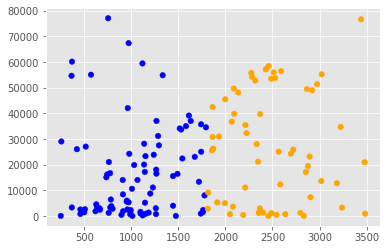

In [8]:
# VISUALIZAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanos[0])
plt.show()

In [9]:
# Se describen los cambios de valores una vez filtrados 
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


### Regresion Lineal Simple (1 atributo con Python y SKLearn)

In [10]:
#Asignamos el atributo de entrada X para entrenamiento y la etiqueta Y.
dataX = filtered_data[["Word count"]]
x_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [14]:
# Se genera el objeto de regresion lineal
regr = linear_model.LinearRegression()

# Se entrena el modelo
regr.fit(x_train, y_train)

# Se realizan las predicciones
y_pred = regr.predict(x_train)
# Se revisan los coeficientes obtenidos. En este caso la tangente
print('Coeficientes: \n', regr.coef_)
# Este es el valor de donde corta el eje Y (x=0)
print('Termino Independiente: \n', regr.intercept_)
# Error cuadrado medio
print('Medida del error cuadrado %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de la varianza. El mejor puntaje es un 1.0
print('Puntaje de la varianza %2.f' % r2_score(y_train, y_pred))

Coeficientes: 
 [5.69765366]
Termino Independiente: 
 11200.303223074163
Medida del error cuadrado 372888728.34
Puntaje de la varianza  0


De la ecuacion de la recta y = mx + b la pendiente "m" es el coefiente 5.69765366 y el termino independete "b" es 11200.303223074163. Existe un error cuadratico grande; por lo cual este modelo no es el mas adecuado.Pero estamos aprendiendo su funcionamiento, lo que resulta imperante por el momento. Esto lo vemos reflejado en el puntaje de varianza el cual debe ser cerca a 1.0

### Visualizacion de la recta obtenida

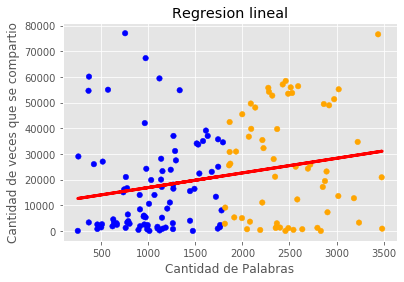

In [17]:
plt.scatter(x_train[:,0], y_train, c=asignar, s=tamanos[0])
plt.plot(x_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Cantidad de veces que se compartio')
plt.title('Regresion lineal')

plt.show()

### Prediccion 1

In [18]:
# Predecir 
# Cuantos "Shares" se obtendra por un articulo de 2000 palabras
y_dosMil = regr.predict([[2000]])
print('Cantidad predecida: ', int(y_dosMil))


Cantidad predecida:  22595
